## Analyzing Indoor GPS Data

The format of the logs is as follows: 
![format](dashboard_log_commented.JPG)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from os import listdir


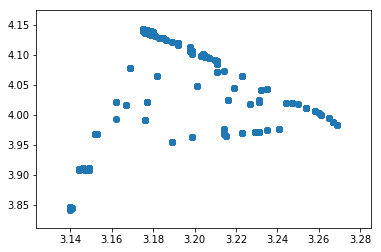

In [51]:
data_no_background = np.genfromtxt("statwith.log", delimiter=",")
x_no_background = data_no_background[:,4]
y_no_background = data_no_background[:,5]
plt.scatter(x_no_background, y_no_background)

In [52]:
posdata = np.vstack((x_no_background, y_no_background))
cov = np.cov(posdata)
print(cov)

[[ 0.00043973 -0.00018924]
 [-0.00018924  0.00454078]]


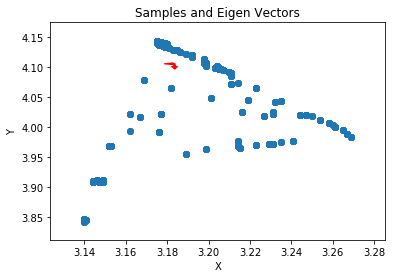

In [53]:
w,v = np.linalg.eig(cov)
mu1 = np.mean(x_no_background)
mu2 = np.mean(y_no_background)
plt.scatter(x_no_background, y_no_background)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Samples and Eigen Vectors")
v1 = (v[:,0]/np.linalg.norm(v[:,0]))*w[0]
v2 = (v[:,1]/np.linalg.norm(v[:,1]))*w[1]
plt.arrow(mu1,mu2, v2[0], v2[1], color="r")
plt.arrow(mu1,mu2, v1[0], v1[1], color="r")


In [54]:
print(np.sum(x_no_background > mu1)/len(x_no_background))

0.17480136208853575
